<html>
<body>   
    
<h1>Introduction-Calculation of metrics for weighted and binary adjacency matrices</h1>

<p>
Below, I show by way of example how we get the different metrics of adjacency matrices. In the example we first get rewired matrices based on heat diffusion (with different diffusion rates (tau)), and then we find different metrics that summarize the properties of each of these adjacency matrices. The metrics are: clustering coefficient, path length, small-worldness, modularity index, assortativity, and rich club measures. The measures are adjusted if we want to take into consideration the weight of the edges-in the case of a weighted adjacency matrix.  
</p> 


</body>
</html>

In [1]:
import numpy as np
#Visualizations
import matplotlib.pyplot as plt

import sys
sys.path.append("..") # Adds higher directory to python modules path, so that we find package netRewireAnalyze

import netRewireAnalyze as net

### 3 helper functions for plotting

In [2]:
#helper function, plots the adjacency matrix, 
#INPUT:
#A: the adjacency matrix to be plotted
#cmap:the cmap of the image, typically 'Greys' or 'coolwarm'
#title:the title on top of the image of the adjacency matrix, defaults to none
#reorderingFlag: if true then reorders rows & columns of the adjacency matrix so that we can see possible clusters,defaults to True
#ticksFlag: if True we do not show the ticks on x and y axes. defaults to False
#colorbarFlag: if False then we do not use colorbar, if True we use, defaults to False
def plotAdj(A, cmap, title = False, fontsize = 12 ,reorderingFlag = True, ticksFlag = True, colorbarFlag = False):
        
    if title is not False:    
        plt.title(title, fontsize=fontsize)
    
    if reorderingFlag == True:
        plt.imshow(net.reorderA2Visualize(A), cmap)
    else:
        plt.imshow(A, cmap)
    
    if ticksFlag == True:
        plt.xticks([])
        plt.yticks([])   
        
    if colorbarFlag == True:
        plt.colorbar()

In [3]:
#helper function, plots a vector y as a function of another vector x 
#INPUT:
#x: vector with the values on the x axis
#y: vector with the values on the y axis
#xlabel: label on the x axis
#ylabel: label on the y axis
#color: color of the plot
#title
#marker
#linestyle
#fontsize
#linewidth
#markersize
def plotOneInstance(x,y,xlabel,ylabel,color,title,marker,linestyle='--',fontsize=16,linewidth=3,markersize=12):
    
    plt.plot(x, y, marker=marker, color=color, linestyle=linestyle, linewidth=linewidth, markersize=markersize)
    if title is not False:
        plt.title(title,fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.tick_params(labelsize=fontsize)    
    

In [4]:
#helper function, plots a number of vectors against each other in the same plot 
#INPUT:
#x: an m dimensional vector with the values on the x axis
#yAll: an nXm dimensional vector with n different vectors of size m that will be plotted against each other
#xlabel: label on the x axis
#ylabel: label on the y axis
#colors: a n dimensional array, of the colors of the lines plotted: colors[i] is the color of yAll[i,:]
#title
#markers: same as colors but for markers
#legendLabels: if False no legend, otherwise an n dimensional array with the names in the legend
#linestyle
#fontsize
#linewidth
#markersize
def plotManyVectors(x,yAll,xlabel,ylabel,colors,title,markers,legendLabels,linestyle='--',fontsize=16,linewidth=3,markersize=12):
    
    
    for i in np.arange(yAll.shape[0]):
         plt.plot(x, yAll[i,:], marker=markers[i], color=colors[i], linestyle=linestyle, linewidth=linewidth, markersize=markersize)
    
    if title is not False:
        plt.title(title,fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xlabel(xlabel, fontsize=fontsize)
    plt.legend(legendLabels)
    plt.tick_params(labelsize=fontsize) 
    

### Initialization. 
### We get two group of adjacency matrices from heat diffusion rewiring, one group with binary weights and another with normal weights. Within each group we run the rewiring for different diffusion rates (tau). We will derive the different metrics from these adjacency matrices. The functions in this subsection can be found in the module initializeRewireNetworks.py

In [5]:
#Initialization: Heat Diffusion rewiring

#the networks will be symmetric and have 100 nodes and 900X2 = 1800 edges
vertices = 100
edges = 900

# the number of rewirings and probability of random rewiring are fixed at 4000 and 0.2 respectively
rewirings = 4000
pRandRewire = 0.2 
#we test for different heat diffusion (tau) parameters, from 0 to 7 in increments of 1
taus = np.arange(8)

#weightDistribution= 'normal'
#mu = 1.
#sigma = 0.25
weightDistribution= 'lognormal'
mu = 0.
sigma = 1.

#where we will be storing the rewired Adjacency matrices, we test both binary and weighted
ABinary = np.zeros((vertices,vertices,len(taus)))
AWeight = np.zeros((vertices,vertices,len(taus)))

# Rewiring Process

for ind, tau in enumerate(taus):
    
    #create random adjacency matrices -binary and weighted from a normal distribution
    ArandBinary = net.generateBinaryRandSymAdj(vertices, edges)
    ArandWeight = net.generateWeightRandSymAdj(vertices, edges, weightDistribution, mu, sigma)   
    
    #rewire the random matrices
    ABinary[:,:,ind] = net.rewireHeatKernel(ArandBinary, pRandRewire, rewirings, tau)
    AWeight[:,:,ind] = net.rewireHeatKernel(ArandWeight, pRandRewire, rewirings, tau)


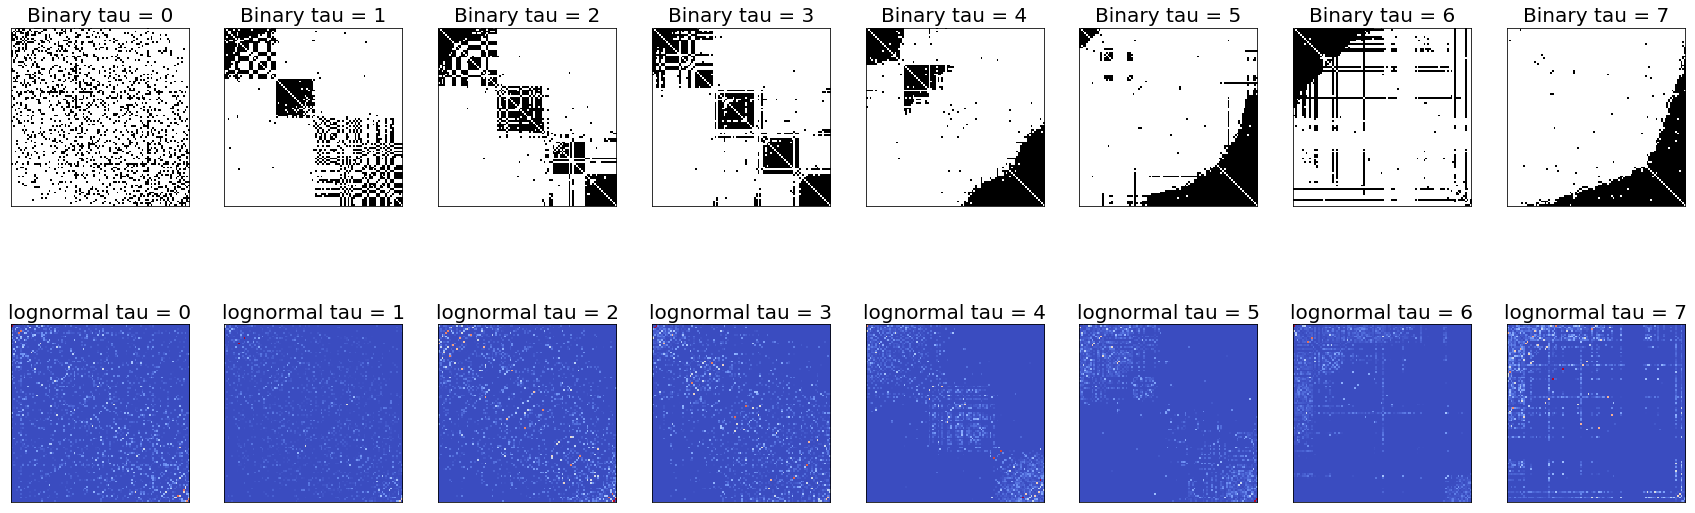

In [6]:
#Visualization of rewired adjacency matrices

num = ABinary.shape[2]
totalNum = 2*num
plt.rcParams['figure.figsize'] = [30, 10]
for i in np.arange(num):
    
    plt.subplot(2,num,i+1)
    ttl = 'Binary tau = ' +str(taus[i]) 
    plotAdj(ABinary[:,:,i], 'Greys', ttl, 20)

    plt.subplot(2,num,num+i+1)
    ttl = weightDistribution +' tau = ' +str(taus[i]) 
    plotAdj(AWeight[:,:,i], 'coolwarm', ttl, 20)
    
plt.show()

### We get the clustering coefficient, path length and small world metrics from the adjacency matrices above. The functions to get these metrics can be found in the module smallWorldMetrics.py

There are 2 nodes with zero or one degre
There is an adjacency matrix with no connections. We remove this row/column
There are 11 nodes with zero or one degre
There is an adjacency matrix with no connections. We remove this row/column
There are 14 nodes with zero or one degre
There is an adjacency matrix with no connections. We remove this row/column


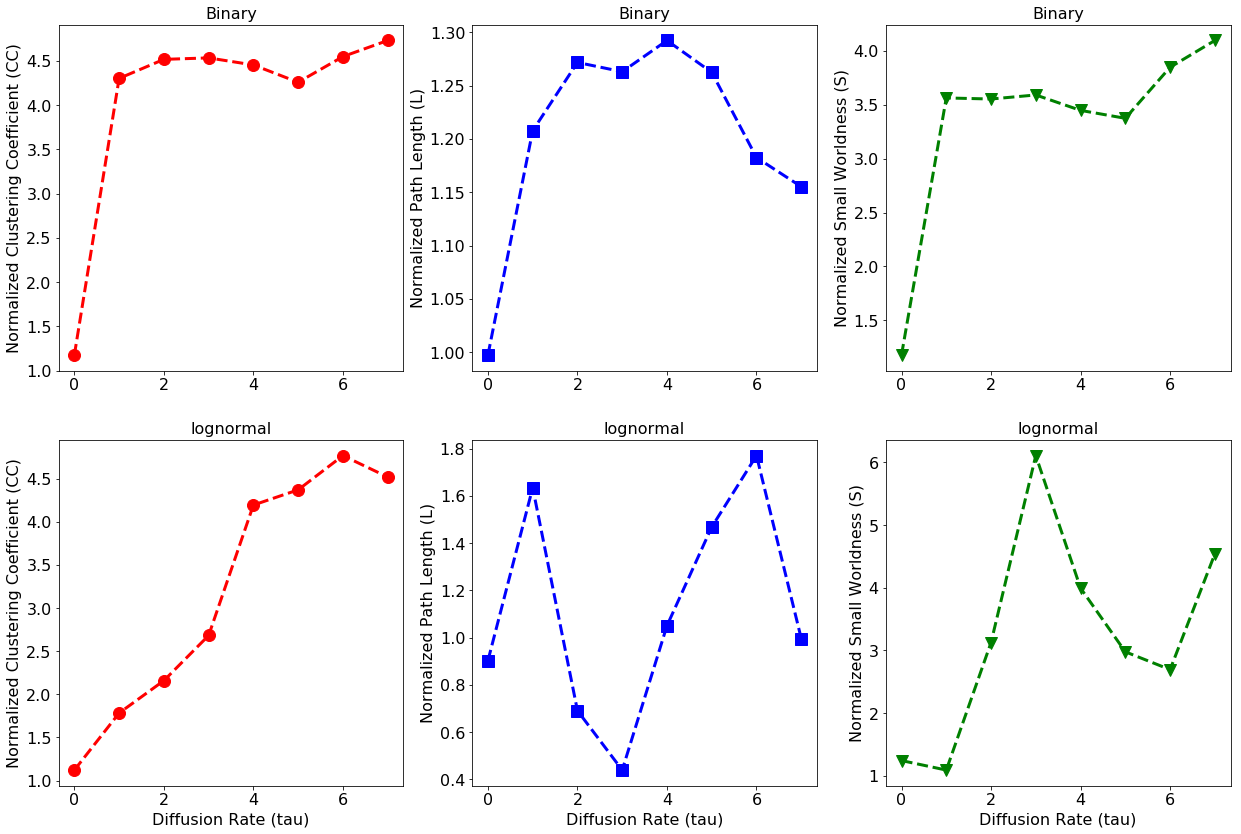

In [7]:
# Get the clustering coefficient, path length and small world metrics from the rewired networks above and plot them

lengthT = len(taus)
#initialize the metrics to store the values
SBNorm = np.zeros(lengthT)
cCBNorm = np.zeros(lengthT) 
LBNorm = np.zeros(lengthT)
SWNorm = np.zeros(lengthT) 
cCWNorm = np.zeros(lengthT)
LWNorm = np.zeros(lengthT)

for ind in np.arange(lengthT):
    #compute binary metrics
    (SBNorm[ind], cCBNorm[ind], LBNorm[ind]) = net.compNormMetrics(ABinary[:,:,ind])
    #compute weighted metrics
    (SWNorm[ind], cCWNorm[ind], LWNorm[ind]) = net.compWeightNormMetrics(AWeight[:,:,ind], weightDistribution, mu, sigma)


#PLOT
xLabel = 'Diffusion Rate (tau)'
plt.rcParams['figure.figsize'] = [21, 14]
#BINARY
ttl = 'Binary'    
plt.subplot(2, 3, 1)
plotOneInstance(taus,cCBNorm,'','Normalized Clustering Coefficient (CC)','red',ttl,'o')
plt.subplot(2, 3, 2)
plotOneInstance(taus,LBNorm,'','Normalized Path Length (L)','blue',ttl,'s')
plt.subplot(2, 3, 3)
plotOneInstance(taus,SBNorm,'','Normalized Small Worldness (S)','green',ttl,'v')

#WEIGHTED
ttl = weightDistribution    
plt.subplot(2, 3, 4)
plotOneInstance(taus,cCWNorm,xLabel,'Normalized Clustering Coefficient (CC)','red',ttl,'o')
plt.subplot(2, 3, 5)
plotOneInstance(taus,LWNorm,xLabel,'Normalized Path Length (L)','blue',ttl,'s')
plt.subplot(2, 3, 6)
plotOneInstance(taus,SWNorm,xLabel,'Normalized Small Worldness (S)','green',ttl,'v')
plt.show()

### We get the modularity index (Q). The functions for this can be found in the module modularity.py

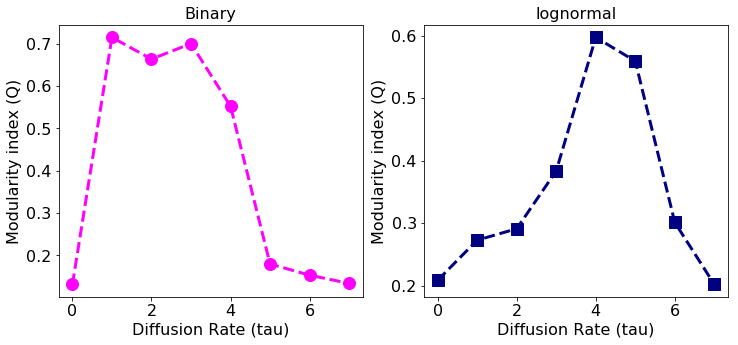

In [8]:
# Now we get the modularity (Q) values from the adjacency matrices and plot them

QB = np.zeros(lengthT)
QW = np.zeros(lengthT) 

for ind in np.arange(lengthT):
    QB[ind] = net.getModularityIndex(ABinary[:,:,ind])
    QW[ind] = net.getModularityIndex(AWeight[:,:,ind])
    
    
#PLOT
plt.rcParams['figure.figsize'] = [12, 5]
#BINARY
plt.subplot(1, 2, 1)
plotOneInstance(taus,QB,xLabel,'Modularity index (Q)','magenta','Binary','o')
plt.subplot(1, 2, 2)
plotOneInstance(taus,QW,xLabel,'Modularity index (Q)','navy', weightDistribution,'s')
plt.show()

### We get the assortativity (homophily) of the adjacency matrices. In the case of the binarized assortativity for the weighted adjacency matrix, we do not consider the weights of the edges, all positive edges count the same. In the weighted case the edges weight is taken into consideration. The functions for this can be found in the module assortativityRichClub.py

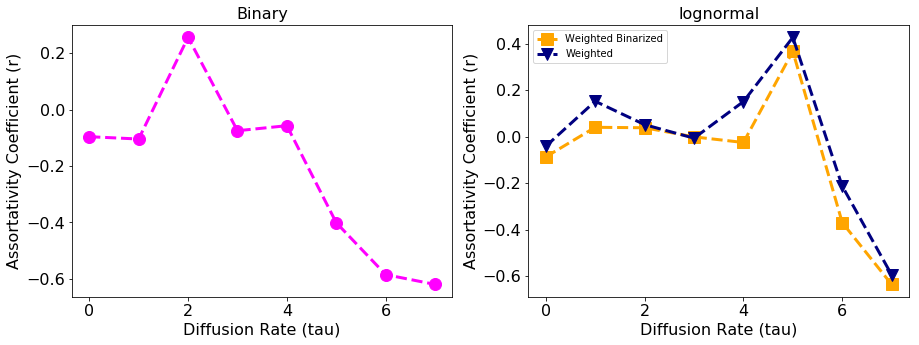

In [9]:
# Assortativity binary, binarized and weighted

rB = np.zeros(lengthT)
rW_B = np.zeros(lengthT)
rW = np.zeros(lengthT)

for ind in np.arange(lengthT):
    rB[ind] = net.getAssortCoef(ABinary[:,:,ind],binarizedFlag = True)
    rW_B[ind] = net.getAssortCoef(AWeight[:,:,ind],binarizedFlag = True)
    rW[ind] = net.getAssortCoef(AWeight[:,:,ind],binarizedFlag = False)


#PLOT    
    
rWAll = np.zeros((2,lengthT))
rWAll[0,:] = rW_B
rWAll[1,:] = rW

yLabel = 'Assortativity Coefficient (r)'
colors = ['orange','navy']
markers = ['s','v']
legendLabels = ['Weighted Binarized','Weighted']

plt.rcParams['figure.figsize'] = [15, 5]
plt.subplot(1, 2, 1)
plotOneInstance(taus,rB,xLabel,yLabel,'magenta','Binary','o')
plt.subplot(1, 2, 2)
plotManyVectors(taus,rWAll,xLabel,yLabel,colors,weightDistribution,markers,legendLabels)
plt.show()

### We get the binary and weighted rich club metrics (unormalized, random and normalized) for the binary and weighted adjacency matrices with diffusion rate (tau) equal to 7. Details on the way they are calculated and their meaning can be found in our paper. The running of the sections below will take some time because the reshuffling of the network for the binary case is time consuming: randomizeKeepDegDistr(Adj, swaps). The functions for the calculation of the rich club metrics can be found in the module assortativityRichClub.py


In [10]:
#Rich club coefficients for tau = 7 

tau = 7
deg2Test  = np.arange(1,61) 
lenDeg = len(deg2Test)
#initialize variables
phiKB = np.zeros(lenDeg)
phiKRandB = np.zeros(lenDeg)
phiKNormB = np.zeros(lenDeg)
phiKW = np.zeros(lenDeg)
phiKRandW = np.zeros(lenDeg)
phiKNormW = np.zeros(lenDeg)

for ind,k in enumerate(deg2Test):
    #print('Testing for nodes with degree greater than %d'%k)
    (phiKB[ind], phiKRandB[ind], phiKNormB[ind], mKB, nKB) = net.getNormalizedRichClubCoef(ABinary[:,:,tau], k, binaryFlag = True, verbose=False)
    (phiKW[ind], phiKRandW[ind], phiKNormW[ind], mKW, nKW) = net.getNormalizedRichClubCoef(AWeight[:,:,tau], k, binaryFlag = False, verbose=False)



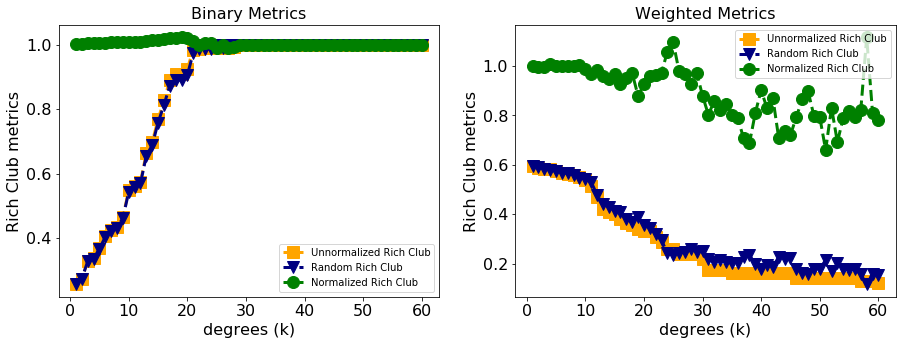

In [11]:
phiBAll = np.zeros((3,lenDeg))
phiBAll[0,:] = phiKB
phiBAll[1,:] = phiKRandB
phiBAll[2,:] = phiKNormB

phiWAll = np.zeros((3,lenDeg))
phiWAll[0,:] = phiKW
phiWAll[1,:] = phiKRandW
phiWAll[2,:] = phiKNormW

xLabel = 'degrees (k)'
yLabel = 'Rich Club metrics'
colors = ['orange','navy','green']
markers = ['s','v','o']
legendLabels = ['Unnormalized Rich Club','Random Rich Club','Normalized Rich Club']

plt.rcParams['figure.figsize'] = [15, 5]
plt.subplot(1, 2, 1)
plotManyVectors(deg2Test,phiBAll,xLabel,yLabel,colors,'Binary Metrics',markers,legendLabels)
plt.subplot(1, 2, 2)
plotManyVectors(deg2Test,phiWAll,xLabel,yLabel,colors,'Weighted Metrics',markers,legendLabels)


